

Найти в интернете любую выборку объёма не менее 100 наблюдений, если вы будете делать программу для её обработки, не менее 20 наблюдений, если вы будете считать вручную.

    По этой выборке (желательно программно, но можно и вручную) построить графики выборочной функции распределения, гистограммы и/или ядерной оценки плотности вероятности.
    В предположении, что наблюдения имеют нормальное распределение, построить односторонние и двусторонние доверительные интервалы надёжности 0,9 и 0,95 для математического ожидания и дисперсии.



In [21]:
import pandas as pd
import numpy as np
from scipy import stats

In [22]:
data = pd.read_csv('SOCR-HeightWeight.csv')

In [23]:
data.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Такс. Тут американская система измерения в попугаях на кубический метр. Приведем к Си.

In [24]:
data['Height(Inches)'] = data['Height(Inches)'] *  2.54
data['Weight(Pounds)'] = data['Weight(Pounds)'] * 0.45359
data.columns = ['index', 'Height', 'Weight']

In [25]:
data.head()

,index,Height,Weight
0,1,167.089607,51.252268
1,2,181.648633,61.909274
2,3,176.272800,69.411472
3,4,173.270164,64.561914
4,5,172.181037,65.451722


## Выборочное среднее, выборочаня дисперсия и выборочаня квантиль
### Выборочное среднее

In [44]:
scipy.stats.tmean(data['Height'])

172.702508535872

### Выборочная дисперсия

In [45]:
scipy.stats.tvar(data['Height'])

23.33145107154699

### Квантиль

In [52]:
np.quantile(data['Height'], .79)

176.603161144

### Построим гистограмму

In [26]:
import matplotlib.pyplot as plt

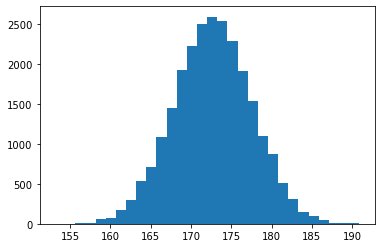

In [28]:
plt.hist(data['Height'], bins = 30);

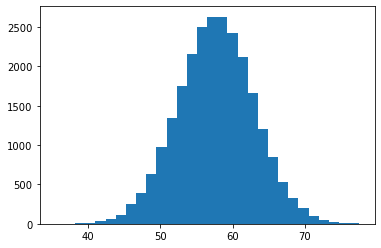

In [29]:
plt.hist(data['Weight'], bins = 30);

## ядерная оцека плотности вероятности

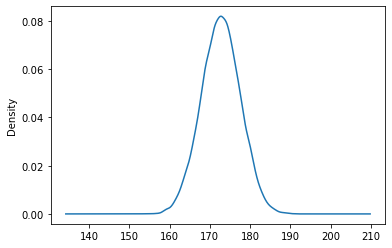

In [31]:
data['Height'].plot.kde();

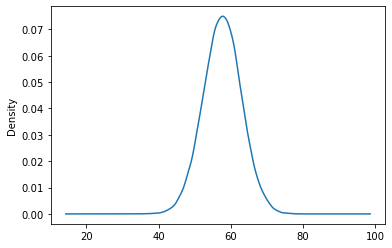

In [32]:
data['Weight'].plot.kde();


### Построим доверительные интревалы
* 1) Слегка измененный велосипед - тут легче формулу увидеть
* 2) Встроенными методами. Результаты ооочень близки


In [42]:
import scipy

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se =  scipy.stats.tmean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h



In [43]:
print(mean_confidence_interval(data['Height']))

(172.702508535872, 172.6426301631557, 172.7623869085883)


In [41]:
mean, sigma = np.mean(data['Height']), np.std(data['Height'])

stats.norm.interval(0.95, loc=mean, scale=sigma/ np.sqrt(len(data['Height'])))

(172.64263425977748, 172.76238281196652)